In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

## Normal case operation

In [7]:
df = pd.read_csv("../results.csv")
df["clients_normalized"] = df["clients"] / df["batch"]
df

,batch,clients,throughput,latency,clients_normalized
0,1,1,9.2462,109.080,1.0
1,1,2,12.3918,162.170,2.0
2,1,3,12.6972,236.388,3.0
3,1,4,12.7196,314.793,4.0
4,2,2,11.2336,178.558,1.0
5,2,4,23.1152,172.921,2.0
6,2,6,23.1152,173.034,3.0
7,2,8,25.6101,312.981,4.0
8,4,4,9.2462,109.020,1.0
9,4,8,45.1464,177.620,2.0


(0.0, 325.08165)

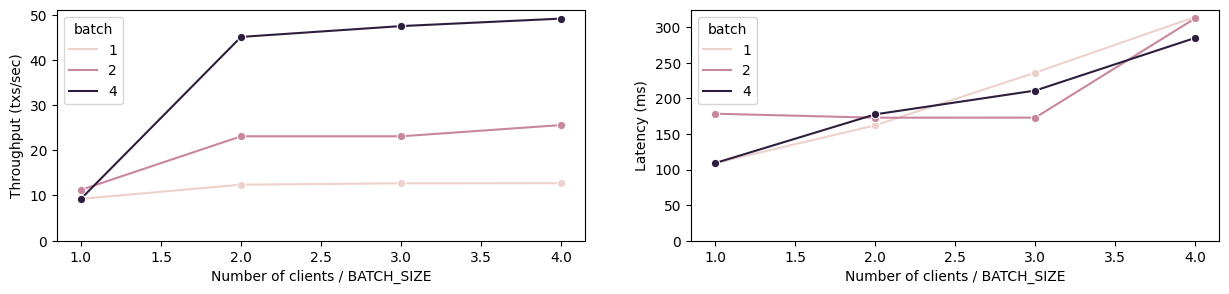

In [8]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x="clients_normalized",y="throughput",hue="batch", marker='o')
plt.xlabel("Number of clients / BATCH_SIZE")
plt.ylabel("Throughput (txs/sec)")
plt.ylim(bottom = 0)
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x="clients_normalized",y="latency",hue="batch", marker='o')
plt.xlabel("Number of clients / BATCH_SIZE")
plt.ylabel("Latency (ms)")
plt.ylim(bottom = 0)

,clients,throughput,latency,clients_normalized,throughput_normalized
batch,,,,,
1,4,12.7196,314.793,4.0,12.71960
2,8,25.6101,312.981,4.0,12.80505
4,16,49.2082,285.313,4.0,12.30205


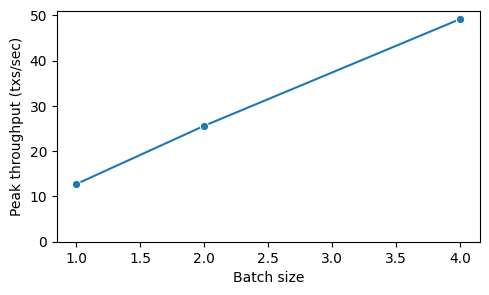

In [49]:
plt.figure(figsize=(12, 3))
# plt.figure(figsize=(15, 3))
df["throughput_normalized"] = df["throughput"] / df["batch"]
peak_df = df.groupby(["batch"]).max()
plt.subplot(1, 2, 1)
sns.lineplot(data=peak_df, x="batch",y="throughput", marker='o')
# plt.subplot(1, 2, 2)
# sns.lineplot(data=peak_df, x="batch",y="throughput_normalized", marker='o')
plt.xlabel("Batch size")
plt.ylabel("Peak throughput (txs/sec)")
plt.ylim(bottom = 0)
peak_df

## Fault scenarios

In [17]:
df = pd.read_csv("../results-faults.csv")
df

,batch,clients,fault,throughput,latency
0,1,1,free,9.2462,109.0800
1,1,2,free,12.3918,162.1700
2,1,3,free,12.6972,236.3880
3,1,4,free,12.7196,314.7930
4,1,1,crash,4.3551,230.4626
5,1,2,crash,5.3876,383.3861
6,1,3,crash,5.6112,547.3300
7,1,4,crash,5.5920,728.4455
8,1,1,delay,4.3551,230.5707
9,1,2,delay,5.3158,383.4257


(0.0, 759.413775)

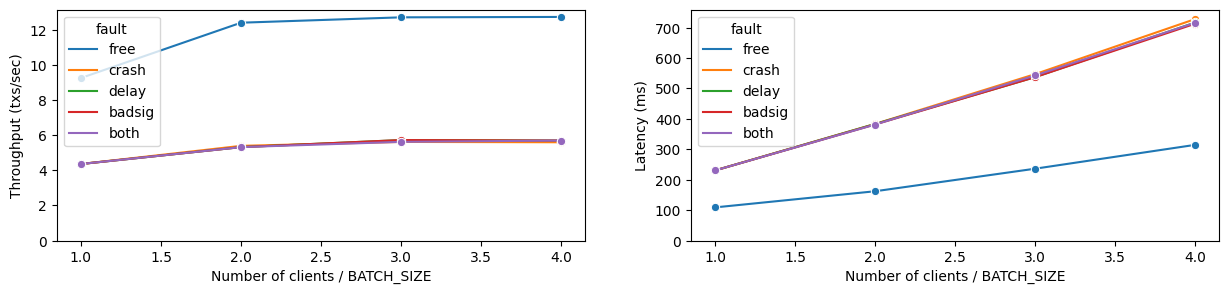

In [18]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x="clients",y="throughput",hue="fault", marker='o')
plt.ylim(bottom = 0)
plt.xlabel("Number of clients / BATCH_SIZE")
plt.ylabel("Throughput (txs/sec)")
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x="clients",y="latency",hue="fault", marker='o')
plt.xlabel("Number of clients / BATCH_SIZE")
plt.ylabel("Latency (ms)")
plt.ylim(bottom = 0)